## Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.set()

## Load data

In [117]:
hindi = pd.read_csv('./data/hindi_hatespeech.tsv', sep='\t')
bengali = pd.read_csv('./data/bengali_hatespeech.csv')

# convert hindi's columns to match that of bengali
hindi['hate'] = (hindi['task_1'] == 'HOF').astype(int)
hindi.rename(columns={'text':'sentence'}, inplace=True)

## Auxiliary functions

In [ ]:
# remove punctuations
import string
punctuation = string.punctuation[:2] + string.punctuation[3:]
translator = str.maketrans(punctuation, ' '*len(punctuation))
def remove_puncs(s):
    s = s.translate(translator)
    return s

## Plot statistics

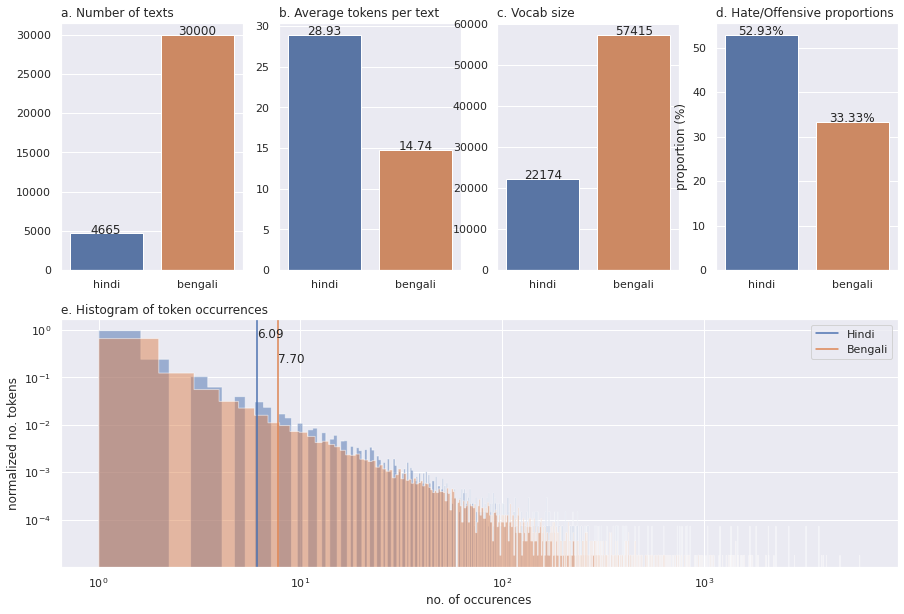

In [188]:
fig = plt.figure(figsize=(15, 10))

# number of texts
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=1)

corpus_sizes = np.array([len(hindi), len(bengali)])
ax1 = sns.barplot(ax=ax1, orient='v', y=corpus_sizes, x=[0, 1])
ax1.set_xticklabels(['hindi', 'bengali'])
ax1.text(0, corpus_sizes[0], corpus_sizes[0], ha='center')
ax1.text(1, corpus_sizes[1], corpus_sizes[1], ha='center')
ax1.set_title('a. Number of texts', loc='left')

# average tokens per text
ax2 = plt.subplot2grid((2, 4), (0, 1), colspan=1)

hindi_sentences = [remove_puncs(sentence) for sentence in hindi['sentence']]
bengali_sentences = [remove_puncs(sentence) for sentence in bengali['sentence']]

hindi_flattened = [w for sentence in hindi_sentences for w in sentence.split()]
bengali_flattened = [w for sentence in bengali_sentences for w in sentence.split()]

tokens = np.array([len(hindi_flattened), len(bengali_flattened)])
tokens_per_text = tokens / corpus_sizes

ax2 = sns.barplot(ax=ax2, orient='v', y=tokens_per_text, x=[0, 1])
ax2.set_xticklabels(['hindi', 'bengali'])
ax2.text(0, tokens_per_text[0], np.round(tokens_per_text[0], 2), ha='center')
ax2.text(1, tokens_per_text[1], np.round(tokens_per_text[1], 2), ha='center')
ax2.set_title('b. Average tokens per text', loc='left')

# vocab size
ax3 = plt.subplot2grid((2, 4), (0, 2), colspan=1)

hindi_vocab = sorted(list(set(hindi_flattened)))
bengali_vocab = sorted(list(set(bengali_flattened)))
vocab_sizes = np.array([len(hindi_vocab), len(bengali_vocab)])

ax3 = sns.barplot(ax=ax3, orient='v', y=vocab_sizes, x=[0, 1])
ax3.set_xticklabels(['hindi', 'bengali'])
ax3.text(0, vocab_sizes[0], np.round(vocab_sizes[0], 2), ha='center')
ax3.text(1, vocab_sizes[1], np.round(vocab_sizes[1], 2), ha='center')
ax3.set_title('c. Vocab size', loc='left')

# Label distribution
ax4 = plt.subplot2grid((2, 4), (0, 3), colspan=1)

hindi_hof_prop = hindi['hate'].mean() * 100
bengali_hof_prop = bengali['hate'].mean() * 100
hof_props = [hindi_hof_prop, bengali_hof_prop]

sns.barplot(ax=ax4, orient='v', y=hof_props, x=[0, 1])
ax4.set_xticklabels(['hindi', 'bengali'])
ax4.text(0, hof_props[0], f'{np.round(hof_props[0], 2)}%', ha='center')
ax4.text(1, hof_props[1], f'{np.round(hof_props[1], 2)}%', ha='center')
ax4.set_ylabel('proportion (%)')
ax4.set_title('d. Hate/Offensive proportions', loc='left')

# histogram of occurrences per token
ax5 = plt.subplot2grid((2, 4), (1, 0), colspan=4)

from collections import Counter
hindi_counter = Counter(hindi_flattened)
bengali_counter = Counter(bengali_flattened)

hindi_occurrences_per_token = len(hindi_flattened) / len(hindi_vocab)
bengali_occurrences_per_token = len(bengali_flattened) / len(bengali_vocab)

ax5.hist(hindi_counter.values(), density=True, bins=6000, histtype='stepfilled', color='#4c72b0', alpha=0.5)
ax5.hist(bengali_counter.values(), density=True, bins=6000, histtype='stepfilled', color='#dd8452', alpha=0.5)
ax5.axvline(hindi_occurrences_per_token, 0, 1, color='#4c72b0', label='Hindi')
ax5.axvline(bengali_occurrences_per_token, 0, 1, color='#dd8452', label='Bengali')
ax5.text(hindi_occurrences_per_token, 0.7, f'{hindi_occurrences_per_token:.2f}')
ax5.text(bengali_occurrences_per_token, 0.2, f'{bengali_occurrences_per_token:.2f}')

ax5.set_xlabel('no. of occurences')
ax5.set_ylabel('normalized no. tokens')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_title('e. Histogram of token occurrences', loc='left')
ax5.legend()

# save and show
plt.savefig('figures/figure_1.png')
plt.show()